In [11]:
import os
from collections import Counter

In [2]:
# Reading multiple files
books_dir = "Books"
# First we look for languages in the books directory
for language in os.listdir(books_dir):
    # Now for authors in the language directory
    for authors in os.listdir(books_dir + "/" + language):
        # Now we look for titles in authors
        for title in os.listdir(books_dir + "/" + language + "/" + authors):
            # Let's check if the code works fine by printing the path of all files
            print(books_dir + "/" + language + "/" + authors + "/" + title)

Books/German/lessing/philotas.txt
Books/German/lessing/die juden.txt
Books/German/lessing/hamburgische dramaturgie.txt
Books/German/lessing/der freigeist.txt
Books/German/lessing/minna von barnhelm.txt
Books/German/lessing/der junge gelehrte.txt
Books/German/lessing/miss sara sampson.txt
Books/German/lessing/emilia galotti.txt
Books/German/schiller/Die Piccolomini.txt
Books/German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
Books/German/schiller/Die Huldigung der KÅnste.txt
Books/German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
Books/German/schiller/Kabale und Liebe.txt
Books/German/schiller/Turandot, Prinzessin von China.txt
Books/German/schiller/Wallensteins Tod.txt
Books/German/schiller/Wallensteins Lager.txt
Books/German/schiller/Die Jungfrau von Orleans.txt
Books/German/schiller/die braut von messina.txt
Books/German/schiller/Der Neffe als Onkel.txt
Books/German/raimund/Der Diamant des Geisterkînigs.txt
Books/German/raimund/Der Verschwender.txt
Books

In [12]:
# Great now we will use these paths to read these files 
def count_words(text):
    text = text.lower()
    skip = [";",".",",",'"',"'"]
    for punc in skip:
        text = text.replace(punc, "")
    word_count = Counter(text.split(" "))       
    return word_count

In [13]:
# Word count stats
def word_count_stats(word_count):
    uniq_words = len(word_count)
    freq = word_count.values()
    return (uniq_words, freq)

In [14]:
# Reading a book
def read_book(pathofbook):
    with open(pathofbook, "r", encoding = "utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [7]:
import pandas as pd

In [9]:
table = pd.DataFrame(columns = ("Name", "Role"))
table.loc[1] = "Luffy", "Captain"
table

,Name,Role
1,Luffy,Captain


In [10]:
table.loc[2] = "Zoro", "Swordsmen"
table.loc[3] = "Nami", "Navigator"
table.loc[4] = "Usopp", "Sniper"
table.loc[5] = "Sanji", "Cook"
table

,Name,Role
1,Luffy,Captain
2,Zoro,Swordsmen
3,Nami,Navigator
4,Usopp,Sniper
5,Sanji,Cook


In [16]:
Book_Data = pd.DataFrame(columns=("Language","Author", "Title", "Unique Words", "Total Words"))
books_dir = "Books"
Row = 1
# First we look for languages in the books directory
for language in os.listdir(books_dir):
    # Now for authors in the language directory
    for authors in os.listdir(books_dir + "/" + language):
        # Now we look for titles in authors
        for title in os.listdir(books_dir + "/" + language + "/" + authors):
            # Let's check if the code works fine by printing the path of all files
            bookpath = books_dir + "/" + language + "/" + authors + "/" + title
            print(bookpath)
            text = read_book(bookpath)
            word_count = count_words(text)
            (uniquewords, frequency) = word_count_stats(word_count)
            Book_Data.loc[Row] = language, authors, title, uniquewords, sum(frequency)
            Row += 1

Books/German/lessing/philotas.txt
Books/German/lessing/die juden.txt
Books/German/lessing/hamburgische dramaturgie.txt
Books/German/lessing/der freigeist.txt
Books/German/lessing/minna von barnhelm.txt
Books/German/lessing/der junge gelehrte.txt
Books/German/lessing/miss sara sampson.txt
Books/German/lessing/emilia galotti.txt
Books/German/schiller/Die Piccolomini.txt
Books/German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
Books/German/schiller/Die Huldigung der KÅnste.txt
Books/German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
Books/German/schiller/Kabale und Liebe.txt
Books/German/schiller/Turandot, Prinzessin von China.txt
Books/German/schiller/Wallensteins Tod.txt
Books/German/schiller/Wallensteins Lager.txt
Books/German/schiller/Die Jungfrau von Orleans.txt
Books/German/schiller/die braut von messina.txt
Books/German/schiller/Der Neffe als Onkel.txt
Books/German/raimund/Der Diamant des Geisterkînigs.txt
Books/German/raimund/Der Verschwender.txt
Books

In [17]:
Book_Data

,Language,Author,Title,Unique Words,Total Words
1,German,lessing,philotas.txt,3294,9535
2,German,lessing,die juden.txt,3909,12143
3,German,lessing,hamburgische dramaturgie.txt,29665,143699
4,German,lessing,der freigeist.txt,6373,23660
5,German,lessing,minna von barnhelm.txt,7392,23863
...,...,...,...,...,...
98,English,shakespeare,The Merchant of Venice.txt,4978,20949
99,English,shakespeare,Macbeth.txt,4780,16874
100,English,shakespeare,A Midsummer Night's Dream.txt,4345,16103
101,English,shakespeare,Othello.txt,5898,26590


In [19]:
Book_Data.loc[45]

Language             French
Author                 sand
Title           Metella.txt
Unique Words           5741
Total Words           19600
Name: 45, dtype: object

In [20]:
Book_Data.head()

,Language,Author,Title,Unique Words,Total Words
1,German,lessing,philotas.txt,3294,9535
2,German,lessing,die juden.txt,3909,12143
3,German,lessing,hamburgische dramaturgie.txt,29665,143699
4,German,lessing,der freigeist.txt,6373,23660
5,German,lessing,minna von barnhelm.txt,7392,23863


In [21]:
Book_Data.tail()

,Language,Author,Title,Unique Words,Total Words
98,English,shakespeare,The Merchant of Venice.txt,4978,20949
99,English,shakespeare,Macbeth.txt,4780,16874
100,English,shakespeare,A Midsummer Night's Dream.txt,4345,16103
101,English,shakespeare,Othello.txt,5898,26590
102,English,shakespeare,Hamlet.txt,6776,28551


In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Words')

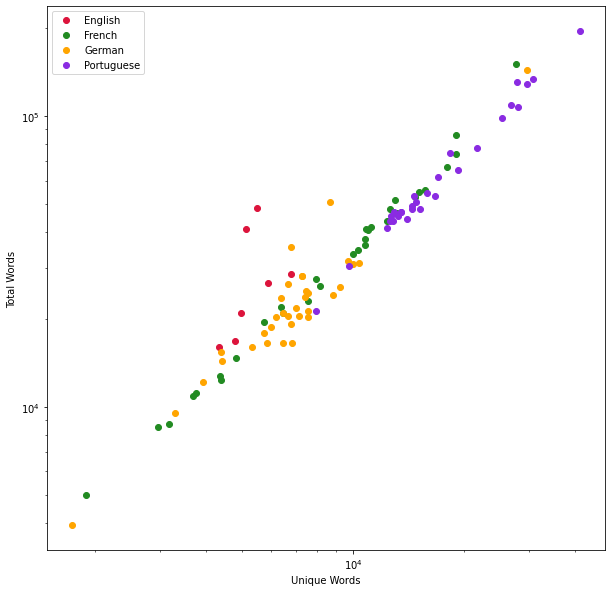

In [26]:
English = Book_Data[Book_Data.Language == "English"]
German = Book_Data[Book_Data.Language == "German"]
French = Book_Data[Book_Data.Language == "French"]
Portuguese = Book_Data[Book_Data.Language == "Portuguese"]
plt.figure(figsize = (10, 10))
plt.loglog(English["Unique Words"], English["Total Words"], "o", label = "English",color = "crimson");
plt.loglog(French["Unique Words"], French["Total Words"], "o", label = "French", color = "forestgreen");
plt.loglog(German["Unique Words"], German["Total Words"], "o", label = "German", color = "orange");
plt.loglog(Portuguese["Unique Words"], Portuguese["Total Words"], "o", label = "Portuguese", color = "blueviolet");
plt.legend()
plt.xlabel("Unique Words")
plt.ylabel("Total Words")

In [ ]:
# -------------------------#